## Model fitting with given Parameters from Journal

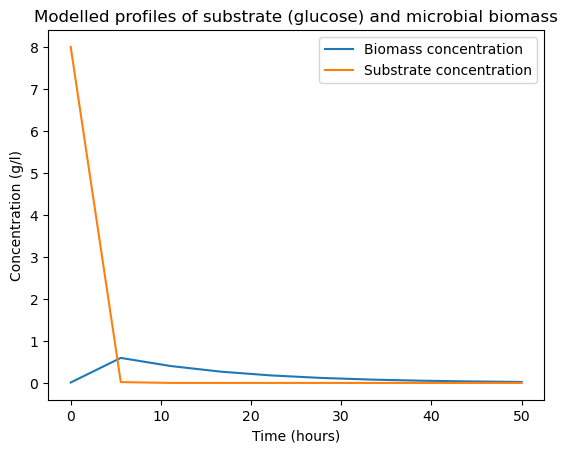

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

time = np.linspace(0, 50, 10)  # Time in hours from the paper

# Values from the conclusion of the paper - for verification
Umax = 0.603  # 1/h
ks = 276  # mg/L
Yx = 0.147  # unitless
pHl = 5.04
kd = 0.073  # 1/h
kh = 1.08  # 1/d
pHm = 6.2
pHu = 7


params1 = Umax, kd, ks, Yx, pHl, pHm

iph = np.exp(-3 * (((pHm - pHu) / (pHu - pHl))**2))

def odes(z, t, params ):
    X, S = z

    Umax, kd, ks, Yx, pHl, pHm = params
    dXdt = ((Umax * S / ks + S) * X * iph - kd * X)
#     dSdt = -(1/Yx) * ((Umax * S / (ks + S)) * X * iph) - kh * S
    dSdt =  - kh * S
    return [dXdt, dSdt]

initial_values = [0.01, 8]  # Adjusted initial values for X and S

result = odeint(odes, initial_values, time, args=(params1,))

X = result[:, 0]
S = result[:, 1]


plt.plot(time, X, label='Biomass concentration')
plt.plot(time, S, label='Substrate concentration')
plt.title( '›')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/l)')
plt.legend()
plt.show()

## Plot of Experimental Data

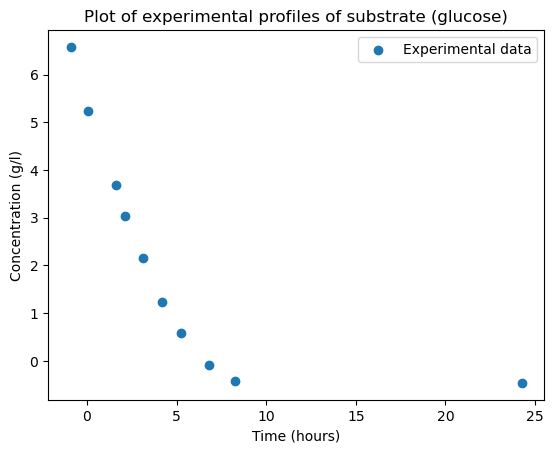

In [2]:
Substrate_exp = pd.read_csv('sugar_exp.csv')
Substrate_model = result[:,1]
x = Substrate_exp["time (h)"]
y = Substrate_exp["C (g/l)"]
plt.scatter (x, y, label ='Experimental data')
plt.title( 'Plot of experimental profiles of substrate (glucose)')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/l)')
plt.legend()

## Model fitting with given Parameters and Experimental data

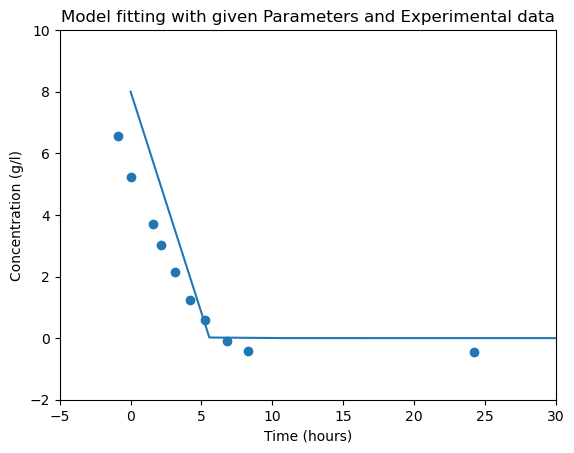

In [3]:
Substrate_exp = pd.read_csv('sugar_exp.csv')
Experimental_time = Substrate_exp["time (h)"]
Experimental_Conc = Substrate_exp["C (g/l)"]
plt.scatter (Experimental_time , Experimental_Conc, label ='Experimental data')
plt.plot(time, Substrate_model, label ='Paper model fit')
plt.title( 'Model fitting with given Parameters and Experimental data')
plt.xlabel('Time (hours)')
plt.ylabel('Concentration (g/l)')
plt.ylim(-2, 10.0)
plt.xlim(-5, 30)

plt.show()


## Attempting to Minimize Model Errors from Parameters using the minimize function.

Optimized Parameters: [7.45646130e-01 6.95178481e-02 1.77972451e+02 1.65759481e-01
 5.20009101e+00 6.38391914e+00]


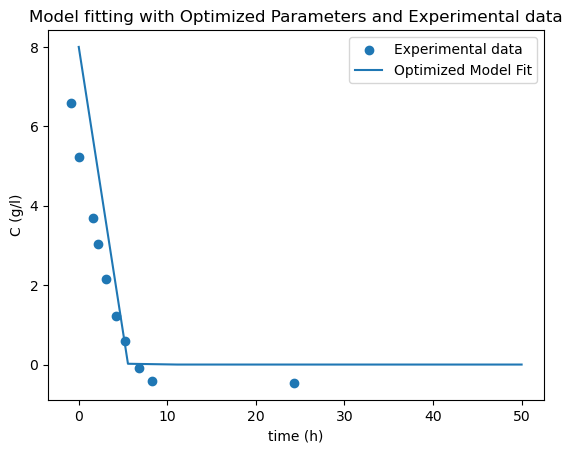

In [4]:

# Define the initial conditions, parameters, and the ODE function (as you've already done)

# Experimental data
Substrate_exp = pd.read_csv('sugar_exp.csv')
Experimental_time = Substrate_exp["time (h)"]
Experimental_Conc = Substrate_exp["C (g/l)"]

params = Umax, kd, ks, Yx, pHl, pHm
# Define the objective function to minimize (RMSE)
def objective_function(params, *args):

    Experimental_Conc, time, initial_values = args

    result = odeint(odes, initial_values, time, args = (params,))
    model_prediction = result[:, 1]  # Cs column
#     model_at_experimental_times = np.interp(Experimental_time, time, model_prediction)
    Experimental_Conc
    rmse = (np.mean((model_prediction - Experimental_Conc)**2))
    return rmse

# Initial guess for parameters

initial_guess = np.array([0.604, 0.0735, 240, 0.145, 5, 7])

# Perform optimization
result = minimize(objective_function, initial_guess, args=(Experimental_Conc, time, initial_values), method='Nelder-Mead')

# Display the optimized parameters
optimized_params = result.x
print("Optimized Parameters:", optimized_params)

result = odeint(odes, initial_values, time, args=(optimized_params,))
Substrate_model = result[:, 1]  # Assuming the substrate concentration is the second column

# Plotting the optimized model against experimental data
plt.scatter(Experimental_time, Experimental_Conc, label='Experimental data')
plt.plot(time, Substrate_model, label='Optimized Model Fit')
plt.title( 'Model fitting with Optimized Parameters and Experimental data')
plt.xlabel("time (h)")
plt.ylabel("C (g/l)")
plt.legend()
plt.show()

## Bifurcation Analysis - Evaluating "Yx"

/var/folders/jf/wd6ykcks0zgfc40s5rd2ysj80000gn/T/ipykernel_63549/1151229893.py:12: RuntimeWarning: divide by zero encountered in scalar divide
  dSdt = -(1/Yx) * ((Umax * S / (ks + S)) * X * iph)


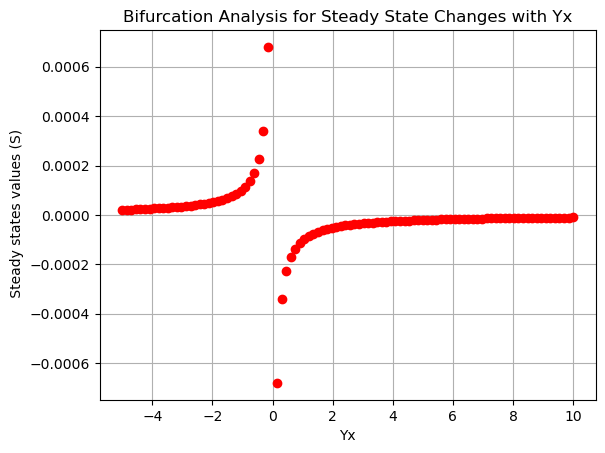

In [5]:

Yx_values = np.linspace(-5, 10, 100)  # Range of mu values to explore


def BifucAnalysis(Yx, params):
    Umax, kd, ks, pHl, pHm = params
    
    
    X= initial_values[0]
    S= initial_values[1]

    dXdt = ((Umax * S / ks + S) * X * iph - kd * X)
    dSdt = -(1/Yx) * ((Umax * S / (ks + S)) * X * iph) 
    
    return dSdt

optimized_params = [ Umax, kd, ks, pHl, pHm]

dSdt_values =[BifucAnalysis(Yx, optimized_params) for Yx in Yx_values ]

plt.plot(Yx_values, dSdt_values, 'ro' )
plt.title('Bifurcation Analysis for Steady State Changes with Yx');
plt.xlabel("Yx")
plt.ylabel(" Steady states values (S)")
plt.grid()


## Analyzing the effect of Sensitivity Analysis for 1%, 10% an 20%

## 1% sensitivity

100.0008013571968


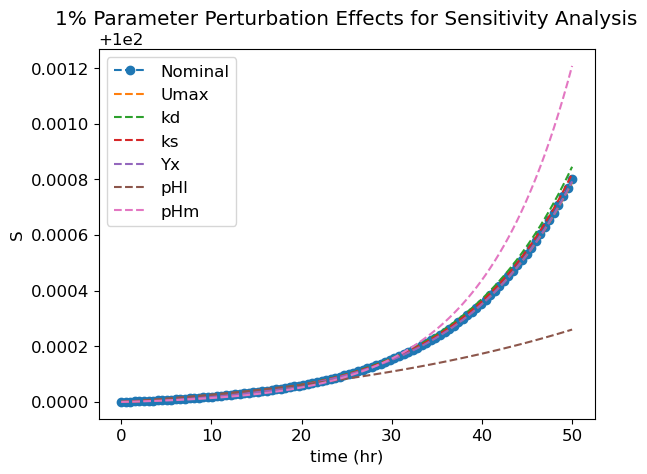

In [6]:
#1% sensitivity

initial_values = [0.01, 100]

def sensitivity(z, t, Umax, kd, ks, Yx, pHl, pHm):

    X= z[0]
    S= z[1]
    
    iph = np.exp(-3 * (((pHm - pHu) / (pHu - pHl))**2))
    
    dXdt = ((Umax * S / ks + S) * X * iph - kd * X)
    dSdt = -(1/Yx) * ((Umax * S / (ks + S)) * X * iph) 
    
    return ([dXdt, dSdt])

timesteps  = np.linspace(0, 50, 100)

y = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063, 14.87))
y1 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404*1.01, -0.13999, 0.09204, 0.45972, 11.063, 14.87))
y2= odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999*1.01, 0.09204, 0.45972, 11.063, 14.87))
y3 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204*1.01, 0.45972, 11.063, 14.87))
y4 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972*1.01, 11.063, 14.87))
y5 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063*1.01, 14.87))
y6 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063, 14.87*1.01))

plt.rcParams.update({'font.size': 12})
plt.xlabel("time (hr)")
plt.ylabel("S")
plt.plot(timesteps, y[:,1], '--o', label = "Nominal");
plt.plot(timesteps, y1[:,1], '--', label = "Umax");
plt.plot(timesteps, y2[:,1], '--', label = "kd");
plt.plot(timesteps, y3[:,1], '--', label = "ks");
plt.plot(timesteps, y4[:,1], '--', label = "Yx");
plt.plot(timesteps, y5[:,1], '--', label = "pHl");
plt.plot(timesteps, y6[:,1], '--', label = "pHm");
plt.title('1% Parameter Perturbation Effects for Sensitivity Analysis');
plt.legend()

# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,1])

## 10 % sensitivity

100.0008013571968


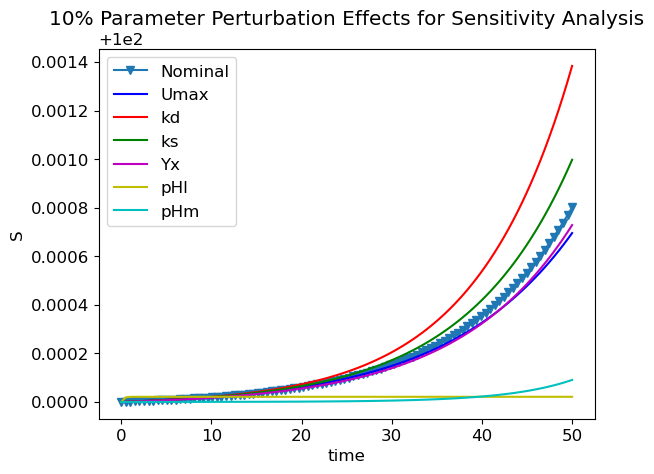

In [7]:
#10% sensitivity

def sensitivity(z, t, Umax, kd, ks, Yx, pHl, pHm):

    X= z[0]
    S= z[1]
    
    iph = np.exp(-3 * (((pHm - pHu) / (pHu - pHl))**2))
    dXdt = ((Umax * S / ks + S) * X * iph - kd * X)
    dSdt = -(1/Yx) * ((Umax * S / (ks + S)) * X * iph) 
    
    return ([dXdt, dSdt])

timesteps  = np.linspace(0, 50, 100)

y = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063, 14.87))
y1 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404*1.1, -0.13999, 0.09204, 0.45972, 11.063, 14.87))
y2= odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999*1.1, 0.09204, 0.45972, 11.063, 14.87))
y3 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204*1.1, 0.45972, 11.063, 14.87))
y4 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972*1.1, 11.063, 14.87))
y5 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063*1.1, 14.87))
y6 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063, 14.87*1.1))


# Umax, kd, ks, Yx, pHl, pHm

plt.rcParams.update({'font.size': 12})
plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, y[:,1], '-v', label = "Nominal");
plt.plot(timesteps, y1[:,1], 'b', label = "Umax");
plt.plot(timesteps, y2[:,1], 'r', label = "kd");
plt.plot(timesteps, y3[:,1], 'g', label = "ks");
plt.plot(timesteps, y4[:,1], 'm', label = "Yx");
plt.plot(timesteps, y5[:,1], 'y', label = "pHl");
plt.plot(timesteps, y6[:,1], 'c', label = "pHm");
plt.title('10% Parameter Perturbation Effects for Sensitivity Analysis');
plt.legend()

# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,1])

## 20 % sensitivity

100.0008013571968


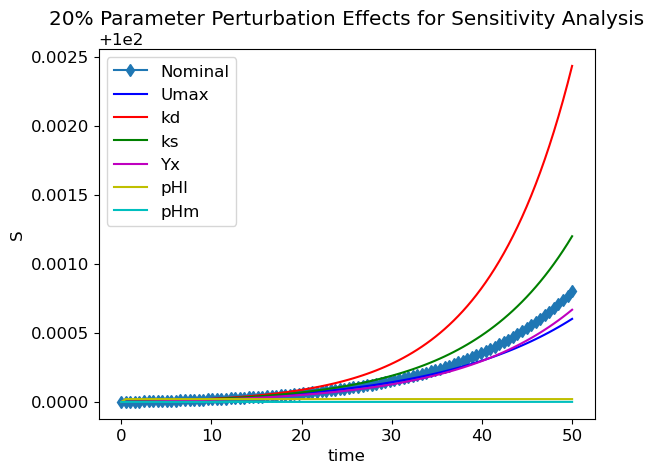

In [8]:
#20% sensitivity

def sensitivity(z, t, Umax, kd, ks, Yx, pHl, pHm):

    X= z[0]
    S= z[1]
    
    iph = np.exp(-3 * (((pHm - pHu) / (pHu - pHl))**2))
    dXdt = ((Umax * S / ks + S) * X * iph - kd * X)
    dSdt = -(1/Yx) * ((Umax * S / (ks + S)) * X * iph) 
    
    return ([dXdt, dSdt])

timesteps  = np.linspace(0, 50, 100)

y = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063, 14.87))
y1 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404*1.2, -0.13999, 0.09204, 0.45972, 11.063, 14.87))
y2= odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999*1.2, 0.09204, 0.45972, 11.063, 14.87))
y3 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204*1.2, 0.45972, 11.063, 14.87))
y4 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972*1.2, 11.063, 14.87))
y5 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063*1.2, 14.87))
y6 = odeint(sensitivity, initial_values, timesteps, args = (-4.4404, -0.13999, 0.09204, 0.45972, 11.063, 14.87*1.2))


plt.rcParams.update({'font.size': 12})
plt.xlabel("time")
plt.ylabel("S")
plt.plot(timesteps, y[:,1], '-d', label = "Nominal");
plt.plot(timesteps, y1[:,1], 'b', label = "Umax");
plt.plot(timesteps, y2[:,1], 'r', label = "kd");
plt.plot(timesteps, y3[:,1], 'g', label = "ks");
plt.plot(timesteps, y4[:,1], 'm', label = "Yx");
plt.plot(timesteps, y5[:,1], 'y', label = "pHl");
plt.plot(timesteps, y6[:,1], 'c', label = "pHm");
plt.title('20% Parameter Perturbation Effects for Sensitivity Analysis');
plt.legend()
# PRint the final value of P for our nominal parameter set. This will be needed later.
print(y[-1,1])

## Global sensitivity Analysis

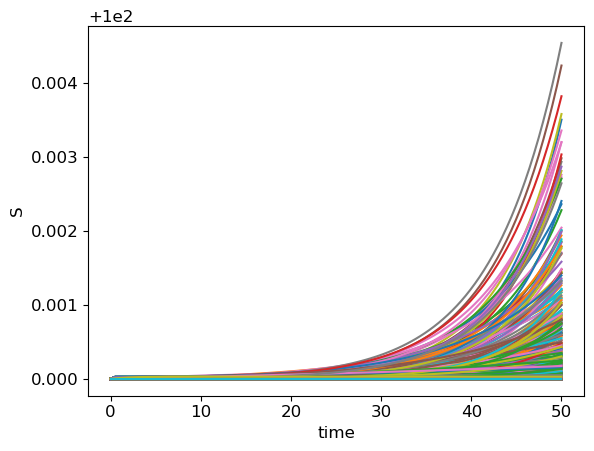

In [9]:
Umax_p = -4.4404
kd_p = -0.13999
ks_p = 0.09204
Yx_p = 0.45972
pHl_p = 11.063
pHm_p = 14.87

N= 1000;
Umax_p = np.random.uniform(-4.4404*0.8, -4.4404*1.2, N);
kd_p = np.random.uniform(-0.13999*0.8, -0.13999*1.2, N);
ks_p = np.random.uniform(0.09204*0.8, 0.09204*1.2, N);
Yx_p = np.random.uniform(0.45972*0.8, 0.45972*1.2, N);
pHl_p = np.random.uniform(11.063*0.8, 11.063*1.2, N);
pHm_p = np.random.uniform(14.87*0.8, 14.87*1.2, N);

S = np.zeros(N);

for m in np.arange(0,N,1):
    output = y = odeint(sensitivity, initial_values, timesteps, args = (Umax_p[m], kd_p[m], ks_p[m], Yx_p[m],
                                                                       pHl_p[m], pHm_p[m]));
    plt.plot (timesteps, output[:,1]);
    plt.xlabel("time");
    plt.ylabel("S");
    S[m] = output[-1,1];

## Global sensitivity Analysis

Using Histogram to visulaize each parameter's value distribution.

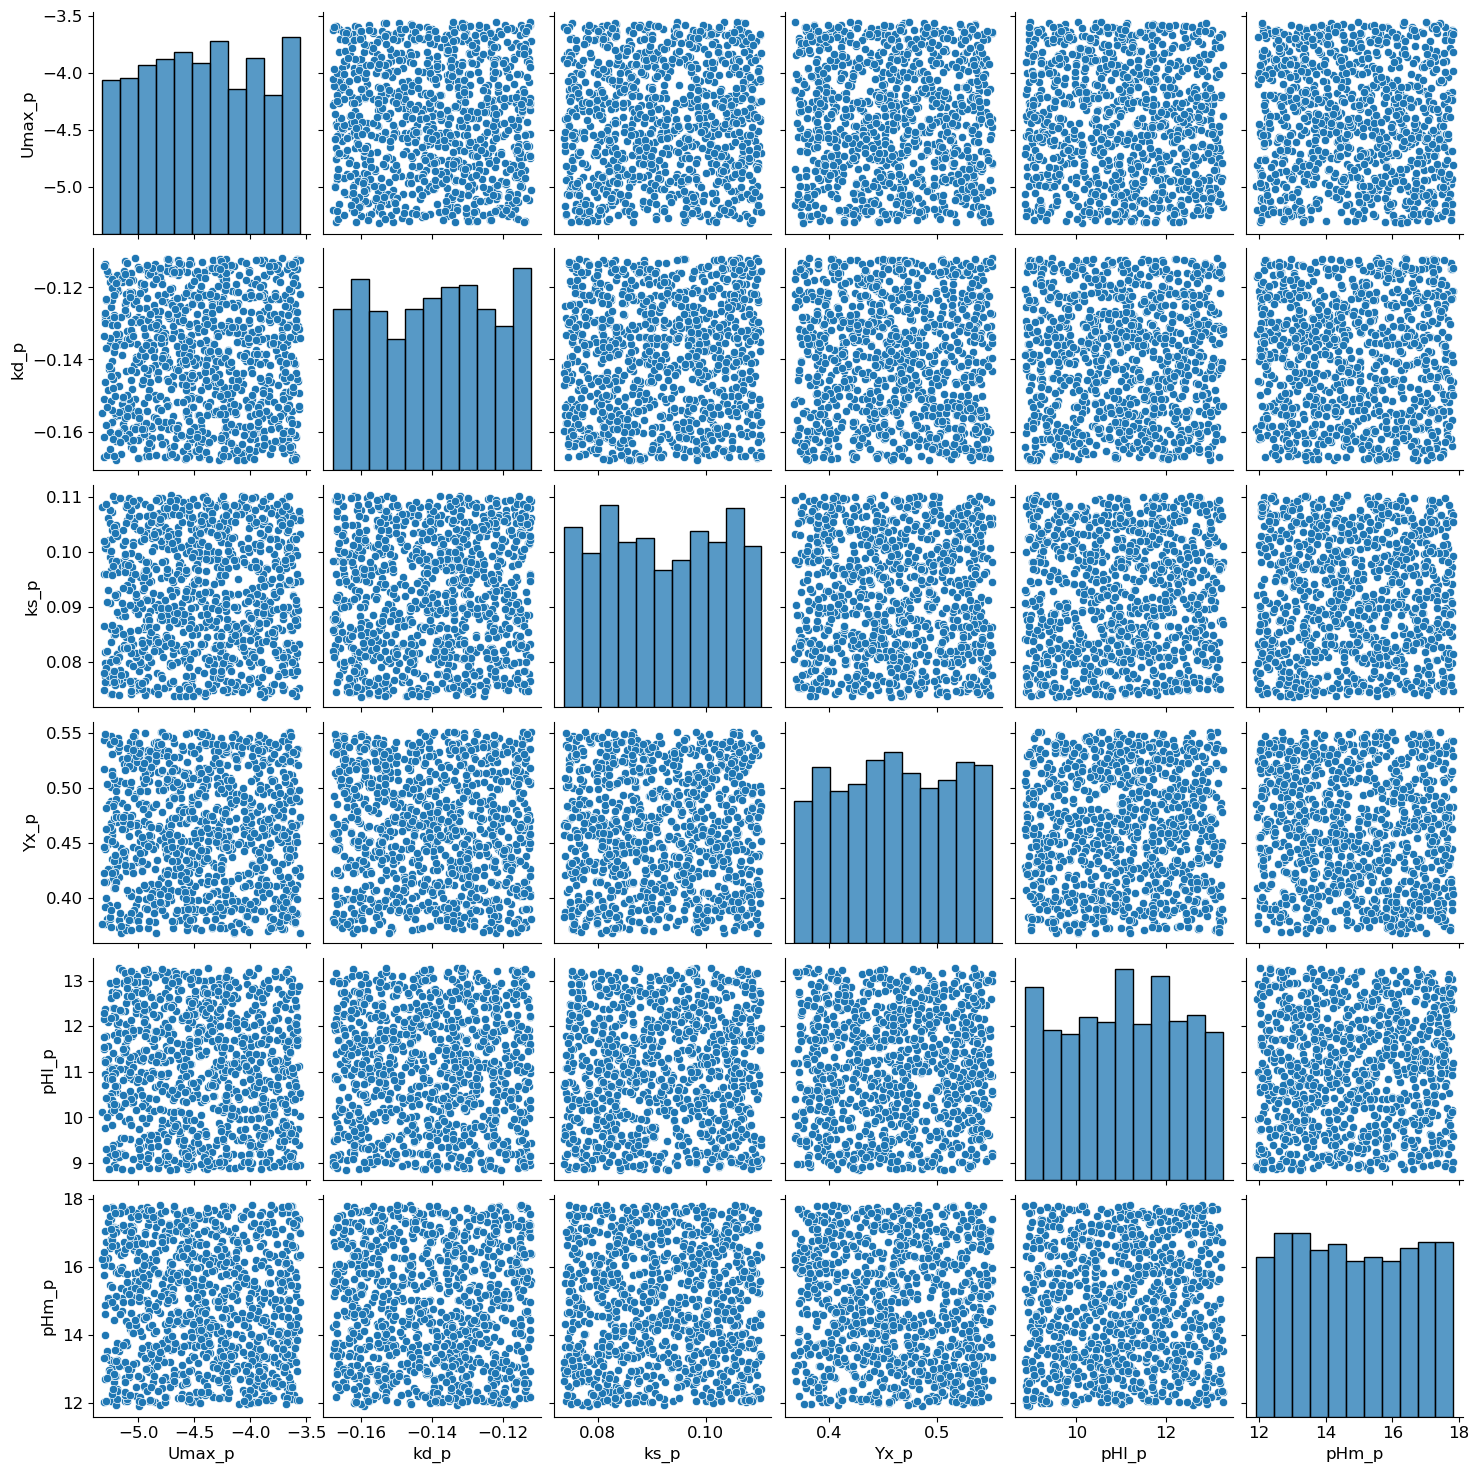

In [10]:
# Plot histograms of sampled parameter space
import pandas as pd
import seaborn as sns

tmp = {'Umax_p':Umax_p, 'kd_p':kd_p, 'ks_p':ks_p, 'Yx_p': Yx_p, 'pHl_p': pHl_p, 'pHm_p': pHm_p};
df = pd.DataFrame(tmp);
del(tmp)

sns.pairplot(df)
20
plt.show()

In [11]:
# # Normalize y
# y = (100-S)/100; # See first set of code to find this number

# # Build our X. Normalize values
# X = np.c_[((-4.4404-Umax)/-4.4404),((-0.13999- kd)/-0.13999),((0.09204-ks)/0.09204), ((0.45972-Yx)/0.45972), ((11.063-pHl)/11.063), ((14.87-pHm)/14.87)]

# # Now can just do the linear least squares estimate
# #===================================================

# from numpy.linalg import inv
# tmp = inv(np.matmul(np.transpose(X),X));

# params = tmp @ np.transpose(X) @ y;
# print("Our fitted equn is y = ",params[0], "Umax + ", params[1], " kd +", params[2],"ks +", params[3], "Yx +", params[4], "pHl +", params[5], "pHm +")

# plt.plot(y,X @ params,"o");
# plt.ylabel("Predicted S");
# plt.xlabel("Actual S");
